In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
encodings  = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv'
for encoding in encodings:
    try:
         df = pd.read_csv(file_path, encoding = encoding)
         print(f"File successfully read with encoding: {encoding}")
         break
    except UnicodeDecodeError:
         print(f"Failed to read with encoding: (encoding)")
         continue

if 'df' in locals():


    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed, Unable to read the CSV file.")










Failed to read with encoding: (encoding)
File successfully read with encoding: latin1
CSV file has been successfully loaded


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3922,ham,Okay lor... Will they still let us go a not ah...,NaN,NaN,NaN
4500,ham,So wat's da decision?,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
5200,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
3332,spam,You are being contacted by our dating service ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

Failed to read with encoding: utf-8
File successfully read witencoding:latin1
      CSV file has been successfully loaded


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
5098,spam,TheMob>Hit the link to get a premium Pink Pant...
2662,spam,Hello darling how are you today? I would love ...
5348,ham,Do I? I thought I put it back in the box
4704,ham,Hey anyway i have to :-)
687,ham,"Dear,Me at cherthala.in case u r coming cochin..."


In [ ]:
df.rename(columns={'v1': 'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2584,ham,Hi happy birthday. Hi hi hi hi hi hi hi
2990,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
1395,ham,Thats cool! I am a gentleman and will treat yo...
4790,ham,Send me your resume:-)
4749,ham,"If you're still up, maybe leave the credit car..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7cf43f0cb9a0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

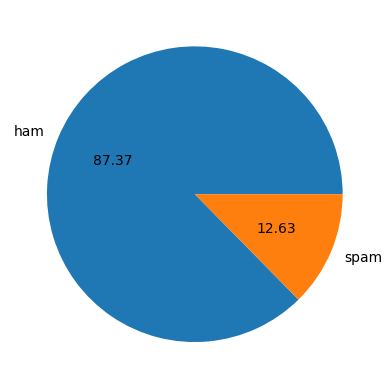

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.loc[:,"num_characters"]=df['text'].apply(len)
df.head()

<ipython-input-30-2a1654d68ac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"num_characters"]=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.loc[:,"num_words"]=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

<ipython-input-31-83ec9d35a8fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"num_words"]=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df.loc[:,"num_sentences"]=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

<ipython-input-32-7a39baefe9bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"num_sentences"]=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
 df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


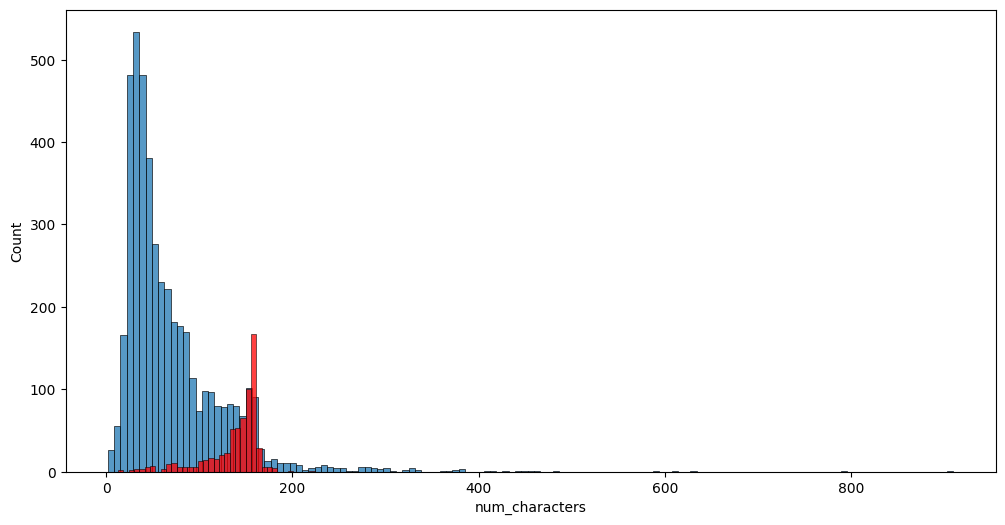

In [ ]:
import seaborn as sns
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convert inf values to NaN
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['target'] == 0]['num_characters'])
    sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


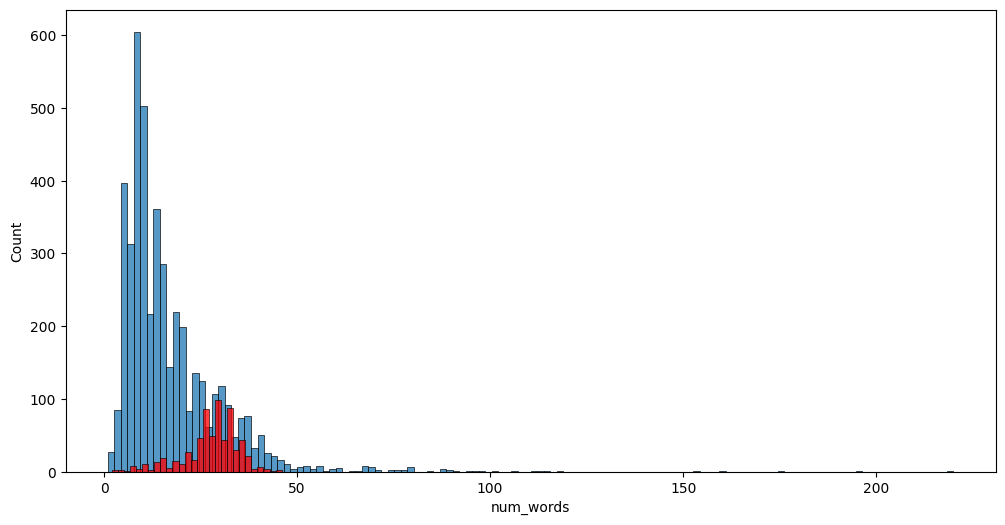

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()



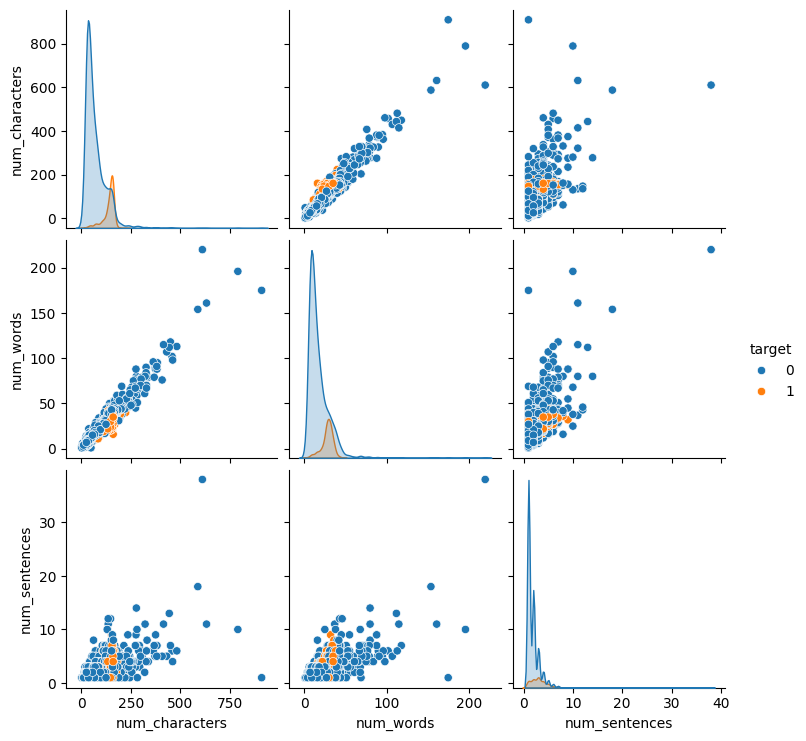

In [ ]:
import pandas as pd
import seaborn as sns
with pd.option_context('mode.use_inf_as_na',True):
  sns.pairplot(df,hue='target')

<Axes: >

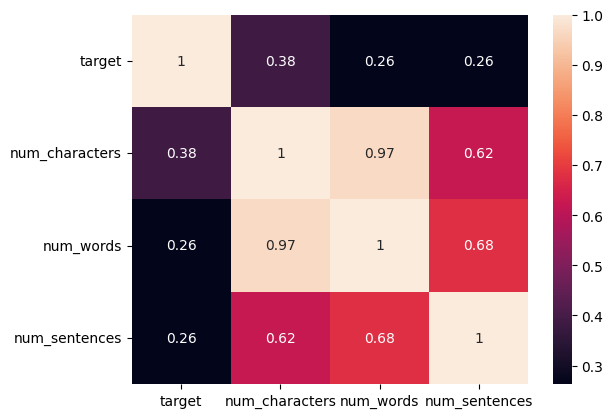

In [ ]:
sns.heatmap(df.select_dtypes(include=['float64','int64','int32']).corr(),annot=True)

In [ ]:
 import nltk
 from nltk.corpus import stopwords
 from nltk.stem import PorterStemmer
 import string
 nltk.download('stopwords')
 ps=PorterStemmer()
 def transform_text(text):
   text = text.lower()
   text = nltk.word_tokenize(text)
   y=[]
   for i in text:
       if i.isalnum():
          y.append(i)
   text =y[:]
   y.clear()

   for i in text:
      if i not in stopwords.words('english')and i not in string.punctuation:
          y.append(i)
   text=y[:]
   y.clear()
   for i in text:
      y.append(ps.stem(i))
   return" ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transformed_text=transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore to night,k?I'vecried enough today")
print(transformed_text)

gon na home soon want talk stuff anymor night k enough today


In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text']=df["text"].apply(transform_text)
df.head()

<ipython-input-40-6b414c2317f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df["text"].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


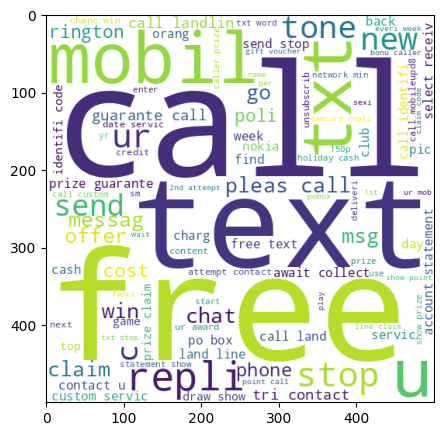

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size = 10,background_color='white')
spam_wc =wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))
plt.figure(figsize=(5,6))
plt.imshow(spam_wc)

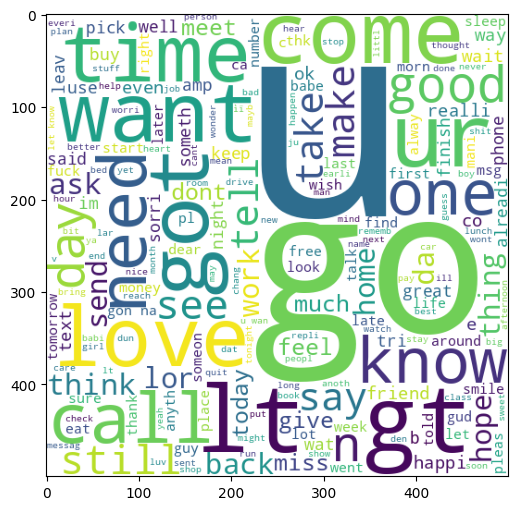

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in (df[df['target'] == 1]['transformed_text'].tolist()):
    for word in msg.split():
      spam_corpus.append(word)
len(spam_corpus)

9939

In [ ]:
ham_corpus = []
for msg in (df[df['target'] == 1]['transformed_text'].tolist()):
    for word in msg.split():
      ham_corpus.append(word)
len(ham_corpus)

9939

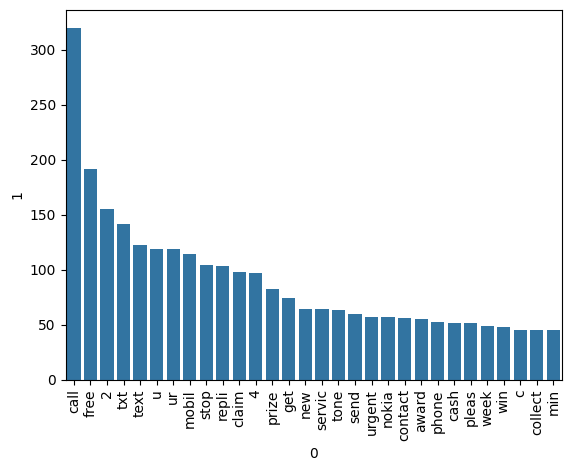

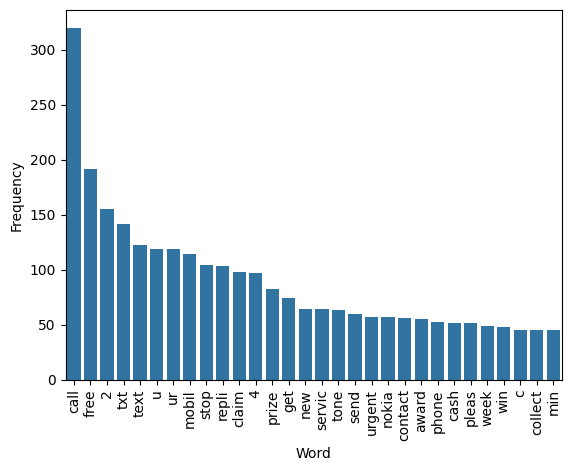

In [ ]:
from collections import Counter
counter = Counter(spam_corpus)
most_common_30 = counter.most_common(30)
df_most_common = pd.DataFrame(most_common_30)

sns.barplot(x=df_most_common[0], y=df_most_common[1])
plt.xticks(rotation='vertical')
plt.show()



from collections import Counter
word_counts = Counter (spam_corpus)
most_common_words = word_counts.most_common(30)
df1 = pd.DataFrame(most_common_words, columns=['Word','Frequency'])

sns.barplot(x='Word', y='Frequency', data =df1)
plt.xticks(rotation='vertical')

plt.show()


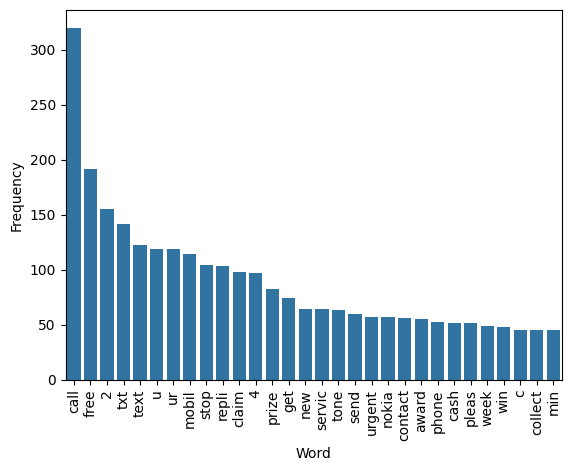

In [ ]:
from collections import Counter
word_counts = Counter (ham_corpus)
most_common_words = word_counts.most_common(30)
df2 = pd.DataFrame(most_common_words, columns=['Word','Frequency'])

sns.barplot(x='Word', y='Frequency', data =df2)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['target'].values

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


svc=SVC(kernel='sigmoid', gamma=1.0)

knc =KNeighborsClassifier()
mnb =MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=5)
Irc =LogisticRegression (solver='liblinear', penalty='11')
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc =AdaBoostClassifier(n_estimators=50, random_state=2)
bc =BaggingClassifier(n_estimators=50, random_state=2)
etc =ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb =XGBClassifier(n_estimators=50, random_state=2)

clfs={
'SVC': svc,
"KN": knc,
"NB": mnb,
'DT': dtc,
'RF': rfc,
'AdaBoost': abc,
'BC': bc,
'ETC': etc,
"GBOT":gbdt,
"xgb":xgb
}




In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred= clf.predict(x_test)
  accuracy =accuracy_score(y_test,y_pred)
  precision =precision_score(y_test,y_pred)
  return accuracy, precision


In [ ]:
 train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores= []
precision_scores = []
for name, clf in clfs.items():
   current_accuracy,current_precision= train_classifier(clf, x_train,y_train,x_test,y_test)
   print("For ",name)
   print("Accuracy-" , current_accuracy)
   print("Precision- ",current_precision)
   accuracy_scores.append(current_accuracy)
   precision_scores.append(current_precision)






For  SVC
Accuracy- 0.9758220502901354
Precision-  0.9747899159663865
For  KN
Accuracy- 0.9052224371373307
Precision-  1.0
For  NB
Accuracy- 0.9709864603481625
Precision-  1.0
For  DT
Accuracy- 0.9284332688588007
Precision-  0.82
For  RF
Accuracy- 0.9758220502901354
Precision-  0.9829059829059829
For  AdaBoost
Accuracy- 0.960348162475822
Precision-  0.9292035398230089
For  BC
Accuracy- 0.9584139264990329
Precision-  0.8682170542635659
For  ETC
Accuracy- 0.9748549323017408
Precision-  0.9745762711864406
For  GBOT
Accuracy- 0.9468085106382979
Precision-  0.9191919191919192
For  xgb
Accuracy- 0.9671179883945842
Precision-  0.9262295081967213


In [ ]:
performance_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precison':precision_score})
performance_df1


,Algorithm,Accuracy,Precison
0,SVC,0.975822,<function precision_score at 0x7cf43bf4b2e0>
1,KN,0.905222,<function precision_score at 0x7cf43bf4b2e0>
2,NB,0.970986,<function precision_score at 0x7cf43bf4b2e0>
3,DT,0.928433,<function precision_score at 0x7cf43bf4b2e0>
4,RF,0.975822,<function precision_score at 0x7cf43bf4b2e0>
5,AdaBoost,0.960348,<function precision_score at 0x7cf43bf4b2e0>
6,BC,0.958414,<function precision_score at 0x7cf43bf4b2e0>
7,ETC,0.974855,<function precision_score at 0x7cf43bf4b2e0>
8,GBOT,0.946809,<function precision_score at 0x7cf43bf4b2e0>
9,xgb,0.967118,<function precision_score at 0x7cf43bf4b2e0>


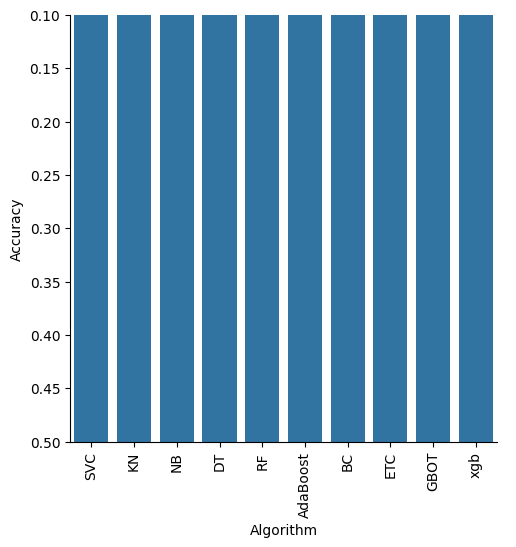

In [ ]:
sns.catplot(x='Algorithm', y='Accuracy',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,0.1)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
temp_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy_max_ft_3000":accuracy_scores, 'precision_max_ft_3000':precision_scores}).sort_values("precision_max_ft_3000",ascending=False)
new_df= performance_df.merge(temp_df,on='Algorithm')
new_df_scaled=new_df.merge(temp_df,on='Algorithm')
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values("precision_num_chars",ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


KeyError: 'precision_num_chars'